# SVC Model (Heart Disease UCI Dataset)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset

## Context
The data is already presented in https://www.kaggle.com/ronitf/heart-disease-uci but there are some descriptions and values that are wrong as discussed in https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877.</br>
So, here is re-processed dataset that was cross-checked with the original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

## Content
There are 13 attributes

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type </br>
   -- Value 0: typical angina </br>
   -- Value 1: atypical angina </br>
   -- Value 2: non-anginal pain </br>
   -- Value 3: asymptomatic </br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
   -- Value 0: normal </br>
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </br>
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria </br>
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment </br>
    -- Value 0: upsloping </br>
    -- Value 1: flat </br>
    -- Value 2: downsloping </br>
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect </br>

and the label </br> 
1. condition: 0 = no disease, 1 = disease

# Training

In [24]:
df = pd.read_csv('heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


# Create a benchmark

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [26]:
X = df.drop("condition", axis=1)
y = df.condition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 13) (60, 13) (237,) (60,)


In [27]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [28]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7046413502109705, 0.55)

In [29]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(f'Accuracy was {int(acc*100)}%.')

Accuracy was 55%.


# Quick Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [31]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

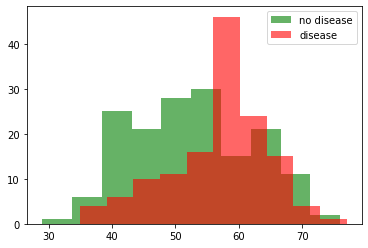

In [32]:
plt.figure(figsize=(6,4))
plt.hist(x=df.age[df.condition == 0], color="green", label="no disease", alpha=0.6)
plt.hist(x=df.age[df.condition == 1], color="red", label="disease", alpha=0.6)
plt.legend()
plt.show()

# Training

In [38]:
X = df.drop("condition", axis=1)
y = df.condition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


In [39]:
y_train.value_counts()

0    112
1     95
Name: condition, dtype: int64

In [40]:
y_test.value_counts()

0    48
1    42
Name: condition, dtype: int64

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [42]:
df_column = []
for col in df.columns:
    df_column.append({"name": col, "value_counts": len(list(df[col].value_counts()))})
df_column = pd.DataFrame(df_column)
df_column

,name,value_counts
0,age,41
1,sex,2
2,cp,4
3,trestbps,50
4,chol,152
5,fbs,2
6,restecg,3
7,thalach,91
8,exang,2
9,oldpeak,40


In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [53]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [52]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["age", "trestbps", "chol", "thalach", "oldpeak"]),
    ("categoric", categorical_pipeline, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 
                                         'ca', 'thal'])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC())
])

parameter = {
    'algo__gamma': np.logspace(-3, 3, 7),
    'algo__C': np.logspace(-3, 3, 7),
}

model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpe

In [49]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,0.053456,0.002343,0.025057,0.004059,10.0,0.01,"{'algo__C': 10.0, 'algo__gamma': 0.01}",0.884058,0.869565,0.811594,0.855072,0.031308,1
35,0.063498,0.014340,0.034409,0.015452,100.0,0.001,"{'algo__C': 100.0, 'algo__gamma': 0.001}",0.884058,0.869565,0.797101,0.850242,0.038039,2
42,0.031762,0.002376,0.020011,0.007105,1000.0,0.001,"{'algo__C': 1000.0, 'algo__gamma': 0.001}",0.840580,0.826087,0.840580,0.835749,0.006832,3
23,0.051136,0.009440,0.029085,0.001375,1.0,0.1,"{'algo__C': 1.0, 'algo__gamma': 0.1}",0.884058,0.782609,0.826087,0.830918,0.041557,4
16,0.037772,0.003765,0.020683,0.003317,0.1,0.1,"{'algo__C': 0.1, 'algo__gamma': 0.1}",0.855072,0.826087,0.811594,0.830918,0.018076,4
22,0.048569,0.004667,0.025065,0.004073,1.0,0.01,"{'algo__C': 1.0, 'algo__gamma': 0.01}",0.869565,0.811594,0.797101,0.826087,0.031308,6
28,0.055845,0.025796,0.022043,0.001405,10.0,0.001,"{'algo__C': 10.0, 'algo__gamma': 0.001}",0.855072,0.811594,0.782609,0.816425,0.029780,7
36,0.055118,0.021684,0.021708,0.002382,100.0,0.01,"{'algo__C': 100.0, 'algo__gamma': 0.01}",0.826087,0.797101,0.826087,0.816425,0.013664,7
30,0.060148,0.010832,0.028418,0.010277,10.0,0.1,"{'algo__C': 10.0, 'algo__gamma': 0.1}",0.840580,0.753623,0.797101,0.797101,0.035500,9
43,0.045100,0.004114,0.016724,0.002392,1000.0,0.01,"{'algo__C': 1000.0, 'algo__gamma': 0.01}",0.826087,0.768116,0.782609,0.792271,0.024633,10


In [54]:
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'algo__C': 10.0, 'algo__gamma': 0.01}
0.855072463768116 0.8550724637681159 0.8666666666666667


# Save Model

In [55]:
import joblib

filename = "./heart_disease_clf.pkl"
joblib.dump(model, filename)

['./heart_disease_clf.pkl']

In [56]:
# load model
model = joblib.load("heart_disease_clf.pkl")

In [57]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [59]:
np.array(y_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [60]:
model.score(X_test, y_test)

0.8666666666666667